# Linear Rgression

In [1]:
from sklearn.linear_model import LinearRegression # import the linear regression model
import matplotlib.pyplot as plt # The plotting library
import numpy as np

### Step 2: Build and visualize a house price dataset

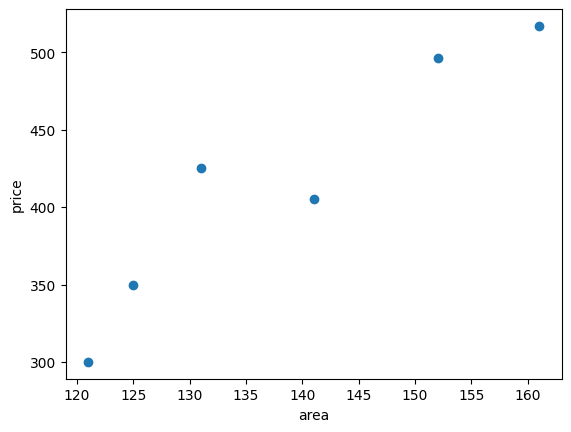

In [2]:
x = np.array([121, 125, 131, 141, 152, 161]).reshape(-1,1)# x denotes the house area as a feature
y = np.array([300, 350, 425, 405, 496, 517]) # y denotes the house price
plt.scatter(x,y)
plt.xlabel("area") # X axis indicates the area
plt.ylabel("price") # Y axis indicates the price
plt.show()

### Step 3: Train the model

In [3]:
lr = LinearRegression() # Encapsulate the linear regression model into an object.
lr.fit(x,y) # Train the model on the dataset.

LinearRegression()

### Step 4 Visualize the model.

In [4]:
w = lr.coef_#Slope of the model
b = lr.intercept_#Intercept of the model
print('Slope:',w)
print('Intercept:',b)

Slope: [4.98467124]
Intercept: -274.8769665187576


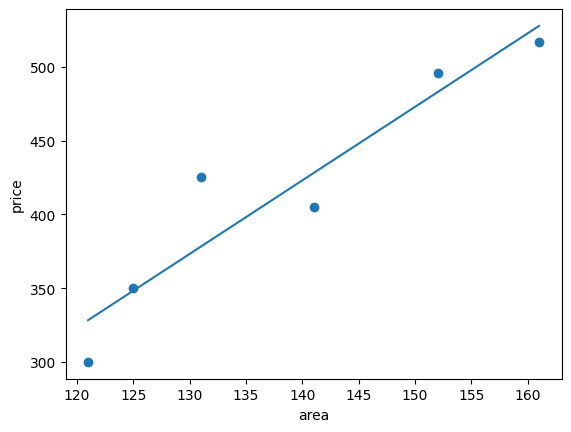

In [5]:
plt.scatter(x,y)
plt.xlabel("area")# X axis indicates the area.
plt.ylabel("price") # Y axis indicates the price
plt.plot([x[0],x[-1]],[x[0]*w+b,x[-1]*w+b])

### Step 5: Start a prediction task using the model

In [6]:
testX = np.array([[130]])# A test sample with an area of 130
lr.predict(testX)

array([373.13029447])

## Linear Regression Implementation (Expansion Experiment)

### Step 1: Import dependancies

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Step 2 Define the function for calculating gradients

In [16]:
def generate_gradient(X, theta, y):
    sample_count = X.shape[0]
    #Calculate the gradient based on the matrix 1/m summation of (((h(x^i)-y^i))x_i^i)
    return (1./sample_count)*X.T.dot(X.dot(theta)-y)

### Step 3: Define the function for reading datasets


In [17]:
def get_training_data(file_path):
    orig_data = np.loadtxt(file_path,skiprows=1)# Ignore the title in the first row of the dataset
    cols = orig_data.shape[1]
    return(orig_data, orig_data[:,:cols-1], orig_data[:,cols-1])

### Step 4: Define the function for initializing parameters

In [18]:
# Initialize the theta array
def init_theta(feature_count):
    return np.ones(feature_count).reshape(feature_count,1)

### Step 5: Define the function for implementing gradient descent

In [19]:
def gradient_descending(X,y, theta, alpha):
    Jthetas=[] # Record the change trend of the cost function J(theta) to confirm the gradient descent is correct
    #Calculate the loss function,which is equal to the square of the difference between the actual value and the predicted value:(y^i-h(x^i))^2
    Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
    index = 0
    gradient = generate_gradient(X,theta,y)# Calculate the gradient
    while not np.all(np.absolute(gradient)<=1e-5): #End the calculation when the gradient is less than 0.00001
        theta = theta-alpha*gradient
        gradient = generate_gradient(X,theta,y) #Calculate the new gradient
        #Calculate the loss function, which isw equal to the square of the difference between the axctual value and the predicted value:(y^i-h(x^i))^2
        Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
        if(index+1)%10==0:
            Jthetas.append((index, Jtheta[0])) #Record the result every 10 calculations
            index +=1
            return theta,Jthetas


### Step 6: Define the function for visualizing the change curve of the loss function

In [20]:
# Plot the loss function change curve
def showJThetaa(diff_value):
    p_x = []
    p_y = []
    for(index,sum)in diff_value:
        p_x.append(index)
        p_y.append(sum)
    plt.plot(p_x,p_y,colour='b')
    plt.xlabel('steps')
    plt.ylabel('loss function')
    plt.title('step-loss function curve')
    plt.show()

### Step 7 Define the function for visualizing data points and the fitted curve.

In [21]:
#Plot the actual data points and the fitted curve.
def showlinecurve(theta, sample_training_set):
    x,y = sample_training_set[:,1],sample_training_set[:,2]
    z = theta[0]+theta[1]*x
    plt.scatter(x,y,colour='b',marker='x',label="sample data")
    plt.plot(x,z,'r',colour="r",label="regression curve")
    plt.xlabel('x')
    plt.ylabel(ý)
    plt.title('liner regression curve')
    plt.legend()
    plt.show()

### Step 8: Plot the final results.

In [23]:
# Read the dataset
training_data_include_y, training_x, y = get_training_data("./first_data.txt")
#Obtain the numbers of samples and features, respectively
sample_count,feature_count = training_x.shape
#Define the learning step aplha
alpha = 0.01
# Initialize theta
theta = init_theta(feature_count)
#Obtain the final parameter theta and cost
result_theta,Jthetas = gradient_descending(training_x,y,theta,alpha)
#Display the parameter
print("w:{}".format(result_theta[0][0]),"b:{}".format(result_theta[1][0]))
showJThetas (Jthetas)
showlinercurve(result_theta,training_data_include_y)




TypeError: cannot unpack non-iterable NoneType object

## 1.2.3 Logistic Regression

### Step 1: Import dependancies.

In [1]:
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression 

###  Step 2: Define the dataset.

In [12]:
# Each item in X denotes the rent and area.
# y indicates whether to rent the room (0: no; 1: yes)
X = [[2200,15],[2750,20],[5000,40],[4000,20],[3300,20],[2000,10],[2500,12],[12000,80],
     [2880,10],[2300,15],[1500,10],[3000,8],[2000,14],[2000,10],[2150,8],[3400,20],
     [5000,20],[4000,10],[3300,15],[2000,12],[2500,14],[10000,100],[3150,10],
     [2950,15],[1500,5],[3000,18],[8000,12],[2220,14],[6000,100],[3050,10]
    ]

y = [1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,1,1,1,0,1,0,1,0,1,1,0]


### Step 3: Preprocess data.


In [13]:
ss = StandardScaler()
X_train = ss.fit_transform(X)

In [24]:
print(X_train)

[[-0.60583897 -0.29313058]
 [-0.37682768 -0.09050576]
 [ 0.56003671  0.71999355]
 [ 0.14365254 -0.09050576]
 [-0.14781638 -0.09050576]
 [-0.68911581 -0.49575541]
 [-0.48092372 -0.41470548]
 [ 3.47472592  2.34099218]
 [-0.32269773 -0.49575541]
 [-0.56420055 -0.29313058]
 [-0.89730789 -0.49575541]
 [-0.27273163 -0.57680534]
 [-0.68911581 -0.33365555]
 [-0.68911581 -0.49575541]
 [-0.62665818 -0.57680534]
 [-0.10617796 -0.09050576]
 [ 0.56003671 -0.09050576]
 [ 0.14365254 -0.49575541]
 [-0.14781638 -0.29313058]
 [-0.68911581 -0.41470548]
 [-0.48092372 -0.33365555]
 [ 2.64195758  3.15149149]
 [-0.21027401 -0.49575541]
 [-0.29355084 -0.29313058]
 [-0.89730789 -0.69838024]
 [-0.27273163 -0.17155569]
 [ 1.80918923 -0.41470548]
 [-0.59751129 -0.33365555]
 [ 0.97642089  3.15149149]
 [-0.25191242 -0.49575541]]


### Step 4: Fit the data.

In [28]:
# Use the fit method of LogisticRegression to train model parameters
lr = LogisticRegression()
lr.fit(X_train,y)

ValueError: Found input variables with inconsistent numbers of samples: [30, 199]

### Step 5: Predict the data.

In [33]:
testX = [[2000,8]]
X_test = ss.transform(testX)
print(" Value to be predicted: ",X_test)
label = lr.predict(X_test)
print("predicted label = ",X_test)
#Output the predicted probability.
prob = lr.predict_proba(X_test)
print("probability = ",prob)

 Value to be predicted:  [[-0.68911581 -0.57680534]]


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## 1.2.4 Decision Tree

### Step 1: Import dependancies

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus

### Step 2: Define the function for generating a decision tree

In [2]:
# Generate a decision tree.
def createTree(trainingData):
    data = trainingData.iloc[:,:-1] #Feature matrix
    labels = trainingData.iloc[:,-1] #Labels
    trainedTree =  tree.DecisionTreeClassifier(criterion="entropy") #Decision tree classifier
    trainedTree.fit(data,labels) #Train the model.
    return trainedTree

### Step 3: Define the function for saving the generated tree diagram.

In [3]:
def showtree2pdf(trainedTree,finename):
    dot_data = tree.export_graphviz(trainedTree,out_file=None)#Export the tree in Graphviz format
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf(finename) #Save the tree diagram to the local machine in PDF format

### Step 4: Define the function for generating vectorized data.

In [4]:
def data2vectoc(data):
    names = data.columns[:-1]
    for i in names:
        col = pd.Categorical(data[i])
        data[i] = col.codes
    return data

### Step 5:Invoke the function for prediction.

In [6]:
data = pd.read_table("./tennis.txt",header=None,sep='\t') # Read training data.
trainingvec=data2vectoc(data) # Vectorize data.
decisionTree=createTree(trainingvec) #Create a decision tree
showtree2pdf(decisionTree,"tennis.pdf") #Plot the decision tree

In [7]:
testVec = [0,0,1,1]# Weather is sunny, temperature is low, humidity is high, and wind is strong.
print(decisionTree.predict(np.array(testVec).reshape(1,-1))) # Predict.

['Y']


## 1.2.5 K-means Algorithm Implementation

### Step 1: Import dependancies.

In [40]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Step 2 Generate the dataset.


In [41]:
X,y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)

In [43]:
print("Dimension of X is {}".format(X.shape))
print("Dimension of y is{}".format(y.shape))

Dimension of X is (500, 2)
Dimension of y is(500,)


### Step 3: Draw scatter graphs

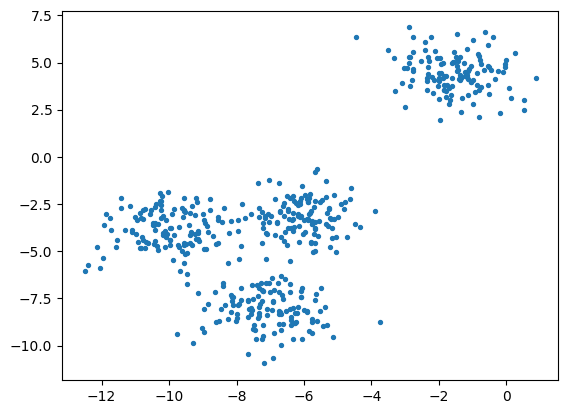

In [44]:
fig, ax1 =plt.subplots(1)
ax1.scatter(X[:, 0], X[:,1]
            ,marker='o' # Set the shape of the point to circle.
            ,s=8 #Set the size of the point.
            )
plt.show()

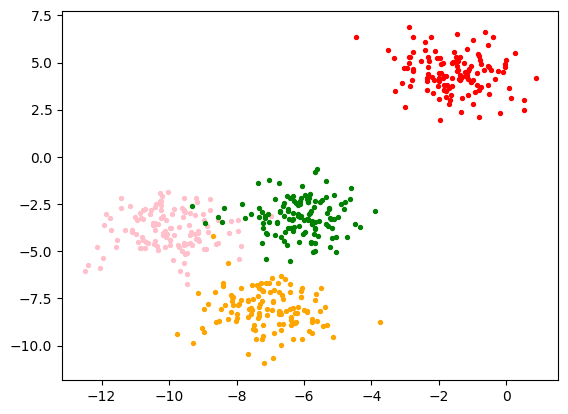

In [45]:
color = ["red","pink","orange","green"]
fig, ax1 = plt.subplots(1)

for i in range(4):
    ax1.scatter(X[y==i,0], X[y==i,1] #Draw the color based on the label.
                ,marker='o' # Set the shape of the point to circle.
                ,s=8 #Set the size of the point.
                ,c=color[i]
                )
plt.show()

### Step 4: Perform k-means clustering.

In [46]:
n_clusters = 3
cluster1 = KMeans(n_clusters=n_clusters,random_state=3).fit(X)

In [47]:
y_pred1 = cluster1.labels_
print(y_pred1)

[0 0 2 1 2 1 2 2 2 2 0 0 2 1 2 0 2 0 1 2 2 2 2 1 2 2 1 1 2 2 0 1 2 0 2 0 2
 2 0 2 2 2 1 2 2 0 2 2 1 1 1 2 2 2 0 2 2 2 2 2 1 1 2 2 1 2 0 2 2 2 0 2 2 0
 2 2 0 2 2 2 1 1 2 1 1 2 2 1 2 2 1 0 2 2 1 0 0 2 0 1 1 0 1 2 1 2 2 1 1 2 2
 0 1 2 1 2 1 2 1 2 2 0 0 2 2 2 1 0 0 2 1 2 2 2 2 0 1 2 1 1 2 0 2 1 1 1 2 2
 0 0 2 2 1 0 1 2 2 2 2 2 2 2 2 2 1 0 0 0 2 1 0 2 2 0 1 2 2 2 2 0 2 2 1 0 0
 2 2 0 0 2 1 1 0 0 2 1 2 0 0 1 0 2 1 2 2 0 2 2 0 2 2 2 2 0 2 2 2 1 2 1 2 0
 2 2 2 2 2 1 2 1 0 2 0 2 1 1 2 0 1 0 2 2 0 0 0 0 2 2 0 2 2 1 1 2 2 1 2 2 2
 1 2 1 2 2 1 2 0 0 2 2 2 2 1 1 2 1 2 0 1 0 1 0 0 1 0 1 1 2 2 2 2 2 2 2 0 1
 0 0 0 2 2 2 0 2 0 0 2 0 0 2 1 0 2 2 1 1 2 0 1 1 2 0 1 1 2 2 1 2 2 0 0 1 2
 0 2 1 1 2 2 2 0 2 1 1 2 1 1 1 1 0 0 2 1 2 2 0 1 2 1 2 1 2 2 2 1 2 2 0 1 0
 0 0 0 0 0 2 0 1 0 1 1 2 1 2 2 2 0 1 2 1 2 0 2 2 0 2 2 1 1 0 2 2 1 2 2 0 0
 2 0 2 2 0 2 0 2 1 0 1 2 2 1 2 2 1 0 2 1 1 2 2 2 2 0 1 0 2 1 0 0 0 2 1 2 0
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 1 2 1 2 2 2 1 1 1 2 2 2 0 2 1 2 0 1 0 1 0
 2 1 1 0 2 2 0 2 2 2 0 2 

In [48]:
centroid1 = cluster1.cluster_centers_
print(centroid1)

[[-7.11207261 -8.09458846]
 [-1.54234022  4.43517599]
 [-8.0807047  -3.50729701]]


### Visualize the clustering result.

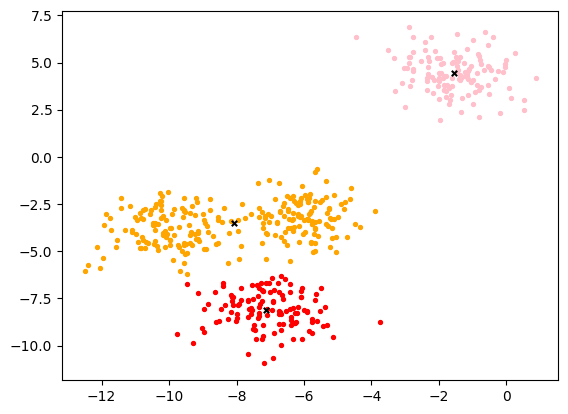

In [52]:
color = ["red","pink","orange","gray"]


fig, ax1 = plt.subplots(1)


for i in range(n_clusters):
    ax1.scatter(X[y_pred1==i,0], X[y_pred1==i,1]
                ,marker='o' # Set the shape of the point to circle.
                ,s=8 #Set the size of the point.
                ,c=color[i]
                )
ax1.scatter(centroid1[:,0],centroid1[:,1]
            ,marker="x"
            ,s=15
            ,c="black")
plt.show()

### Step 5: Perform k-means clustering again.

In [55]:
n_clusters = 4
cluster2 = KMeans(n_clusters=n_clusters,random_state =0).fit(X)
y_pred2 = cluster2.labels_
centroid2 = cluster2.cluster_centers_
print("Centroid:{}".format(centroid2))

Centroid:[[ -6.08459039  -3.17305983]
 [ -1.54234022   4.43517599]
 [ -7.09306648  -8.10994454]
 [-10.00969056  -3.84944007]]


### Visualize the clustering result.

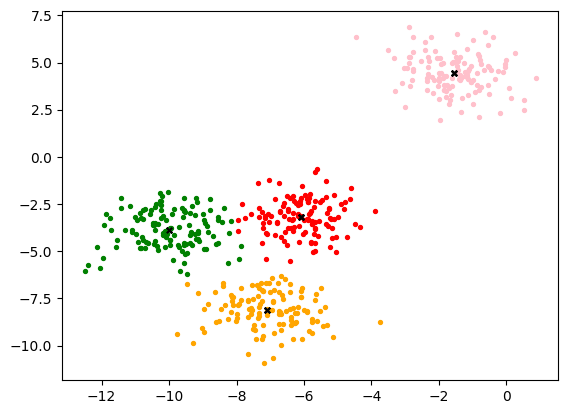

In [57]:
color = ["red","pink","orange","green"]

fig,ax1 = plt.subplots(1)


for i in range(n_clusters):
    ax1.scatter(X[y_pred2==i,0], X[y_pred2==i,1]
                ,marker='o' #Set the shape of the point to circle.
                ,s=8 # Set the size of the point.
                ,c=color[i]
                )
    ax1.scatter(centroid2[:,0],centroid2[:,1]
                ,marker="x"
                ,s=15
                ,c="black")
plt.show()